In [5]:
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style

import pandas as pd
import pandas_datareader.data as web

In [6]:
style.use('ggplot')

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()

In [7]:
tesla_df = web.DataReader("TSLA", 'yahoo', start, end)
elastic_df = web.DataReader("ESTC", 'yahoo', start, end)
netflix_df = web.DataReader("NFLX", 'yahoo', start, end)
okta_df = web.DataReader("OKTA", 'yahoo', start, end)
nasdaq_df = web.DataReader("NDAQ", 'yahoo', start, end)

In [8]:
nasdaq_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,15.0,15.0,15.0,15.00,1300.0,12.973607
2002-07-02,16.5,15.0,15.5,15.13,7000.0,13.086045
2002-07-03,16.0,14.0,14.0,15.00,10200.0,12.973607
2002-07-05,15.0,15.0,15.0,15.00,500.0,12.973607
2002-07-08,14.0,14.0,14.0,14.00,300.0,12.108699


In [9]:
tesla_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-29,835.000000,804.210022,808.750000,835.000000,11812500,835.000000
2020-06-01,899.000000,854.099976,858.000000,898.099976,14939500,898.099976
2020-06-02,908.659973,871.000000,894.700012,881.559998,13565600,881.559998
2020-06-03,897.940002,880.099976,888.119995,882.960022,7927400,882.960022
2020-06-04,895.750000,874.159973,889.880005,877.429993,6070427,877.429993


In [10]:
tesla_df.reset_index(inplace=True)
tesla_df.set_index("Date", inplace=True)

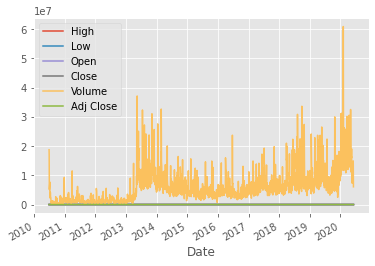

In [11]:
tesla_df.plot()
plt.show()

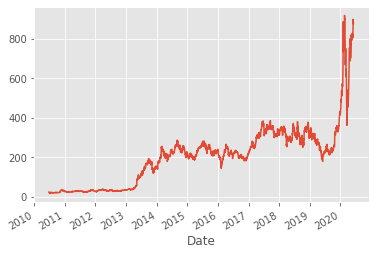

In [12]:
tesla_df['Adj Close'].plot()
plt.show()

In [13]:
tesla_df[['High','Low']]

,High,Low
Date,,
2010-06-29,25.000000,17.540001
2010-06-30,30.420000,23.299999
2010-07-01,25.920000,20.270000
2010-07-02,23.100000,18.709999
2010-07-06,20.000000,15.830000
...,...,...
2020-05-29,835.000000,804.210022
2020-06-01,899.000000,854.099976
2020-06-02,908.659973,871.000000


In [14]:
# add the median average at 60 times
tesla_df['moving_average'] = tesla_df['Adj Close'].rolling(window=60, min_periods=0).mean()
elastic_df['moving_average'] = elastic_df['Adj Close'].rolling(window=60, min_periods=0).mean()
netflix_df['moving_average'] = netflix_df['Adj Close'].rolling(window=60, min_periods=0).mean()
okta_df['moving_average'] = okta_df['Adj Close'].rolling(window=60, min_periods=0).mean()
nasdaq_df['moving_average'] = nasdaq_df['Adj Close'].rolling(window=60, min_periods=0).mean()


# add the symbol info
tesla_df['symbol'] = "TSLA"
elastic_df['symbol'] = "ESTC"
netflix_df['symbol'] = "NFLX"
okta_df['symbol'] = "OKTA"
nasdaq_df['symbol'] = "NDAQ"


# add name
tesla_df['name'] = "Tesla, Inc."
elastic_df['name'] = "Elastic NV"
netflix_df['name'] = "Netflix, Inc."
okta_df['name'] = "Okta, Inc."
nasdaq_df['name'] = "Nasdaq, Inc."


# add description
# add name
tesla_df['description'] = "Tesla, Inc. (formerly Tesla Motors, Inc.), is an American electric vehicle and clean energy company based in Palo Alto, California."
elastic_df['description'] = "Elasticsearch is a search engine based on the Lucene library. It provides a distributed, multitenant-capable full-text search engine with an HTTP web interface and schema-free JSON documents. Elasticsearch is developed in Java."
netflix_df['description'] = "Netflix, Inc. is an American media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California."
okta_df['description'] = "Okta, Inc. is a publicly traded identity and access management company based in San Francisco. It provides cloud software that helps companies manage and secure user authentication into modern applications, and for developers to build identity controls into applications, website web services and devices. It was founded in 2009 and had its initial public offering in 2017, being valued at over $6 billion."
nasdaq_df['description'] = "Nasdaq, Inc. is an American multinational financial services corporation that owns and operates (and is listed on) the Nasdaq stock market and eight European Stock Exchanges, including the Armenian Stock Exchange, Copenhagen Stock Exchange, Helsinki Stock Exchange, Iceland Stock Exchange, Riga Stock Exchange, Stockholm Stock Exchange, Tallinn Stock Exchange, and NASDAQ OMX Vilnius. It is headquartered in New York City, and its president and chief executive officer is Adena Friedman."


In [15]:
elastic_df.head()

,High,Low,Open,Close,Volume,Adj Close,moving_average,symbol,name,description
Date,,,,,,,,,,
2018-10-05,74.199997,66.169998,70.000000,70.000000,7172900,70.000000,70.000000,ESTC,Elastic NV,Elasticsearch is a search engine based on the ...
2018-10-08,73.400002,64.000000,73.000000,65.940002,983700,65.940002,67.970001,ESTC,Elastic NV,Elasticsearch is a search engine based on the ...
2018-10-09,68.000000,62.570000,65.589996,66.449997,370400,66.449997,67.463333,ESTC,Elastic NV,Elasticsearch is a search engine based on the ...
2018-10-10,66.000000,60.610001,65.610001,62.500000,479600,62.500000,66.222500,ESTC,Elastic NV,Elasticsearch is a search engine based on the ...
2018-10-11,63.250000,58.549999,62.430000,60.869999,751100,60.869999,65.152000,ESTC,Elastic NV,Elasticsearch is a search engine based on the ...


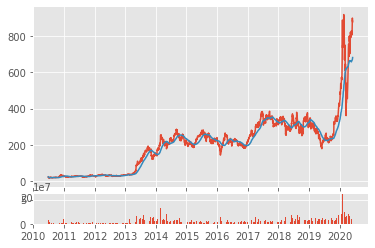

In [16]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(tesla_df.index, tesla_df['Adj Close'])
ax1.plot(tesla_df.index, tesla_df['moving_average'])
ax2.bar(tesla_df.index, tesla_df['Volume'])

plt.show()

In [17]:
netflix_df.head()
nasdaq_df.head()

,High,Low,Open,Close,Volume,Adj Close,moving_average,symbol,name,description
Date,,,,,,,,,,
2002-07-01,15.0,15.0,15.0,15.00,1300.0,12.973607,12.973607,NDAQ,"Nasdaq, Inc.","Nasdaq, Inc. is an American multinational fina..."
2002-07-02,16.5,15.0,15.5,15.13,7000.0,13.086045,13.029826,NDAQ,"Nasdaq, Inc.","Nasdaq, Inc. is an American multinational fina..."
2002-07-03,16.0,14.0,14.0,15.00,10200.0,12.973607,13.011086,NDAQ,"Nasdaq, Inc.","Nasdaq, Inc. is an American multinational fina..."
2002-07-05,15.0,15.0,15.0,15.00,500.0,12.973607,13.001717,NDAQ,"Nasdaq, Inc.","Nasdaq, Inc. is an American multinational fina..."
2002-07-08,14.0,14.0,14.0,14.00,300.0,12.108699,12.823113,NDAQ,"Nasdaq, Inc.","Nasdaq, Inc. is an American multinational fina..."


In [18]:
tesla_df.to_csv("data/tesla_df.csv")
elastic_df.to_csv("data/elastic_df.csv")
netflix_df.to_csv("data/netflix_df.csv")
okta_df.to_csv("data/okta_df.csv")
nasdaq_df.to_csv("data/nasdaq_df.csv")

In [19]:
print(elastic_df.shape)
print(netflix_df.shape)
print(tesla_df.shape)
print(okta_df.shape)
print(nasdaq_df.shape)

(418, 10)
(4540, 10)
(2501, 10)
(795, 10)
(4514, 10)


# Transfor data to elastic documents

In [20]:
import json
import csv
import itertools

In [21]:
def lower_space(iterator):
    return itertools.chain([next(iterator).replace(" ", "_").lower()], iterator)
# replace " " with _ and lowercase field names

In [22]:
# set the name of the csv file where to get data and the name for the index
csv_file_h = "data/nasdaq_df.csv"
index_name = "nasdaq_index"

In [23]:
data_list = []

with open(csv_file_h) as csv_file:
    # replace a blank space with an underscore
    csv_file = lower_space(csv_file)
    
    csvReader = csv.DictReader(csv_file)

    for row in csvReader:
        for item in row:
            if row[item].isdigit():
                row[item] = int(row[item])
             
            if item != 'date' and item != 'description' and item != 'symbol' and item != 'name':
                row[item] = float(row[item])
            
        data_list.append(dict(row))        

# Following option generate a bulk ready json file (skip if not needed)

In [24]:
my_header = '{"index": {"_index": "' + index_name + '"}}'

with open('data/nasdaq_data.json', 'w') as bulk_file:
    for x in data_list:
        my_dict = {k:v for k, v in x.items()}
        bulk_file.write(my_header + '\n' + json.dumps(my_dict) + '\n')

# Following option insert data directly to elasticsearch
## 1 - create mapping
## 2 - create elasticsearch client
## 3 - create index and upload data in bulk

In [25]:
ticker_mapping = {
  "mappings": {
    "properties": {
      "date": {
        "type": "date"
      },
      "high": {
        "type": "float"
      },
      "low": {
        "type": "float"
      },
      "open": {
        "type": "float"
      },
      "close": {
        "type": "float"
      },
      "adj_close": {
        "type": "float"
      },
      "volume": {
        "type": "integer"
      },
        "moving_average": {
        "type": "float"
      },
      "description": {
        "type": "text"
      },
      "symbol": {
          "type": "keyword"
      },
      "name": {
          "type": "text"
      }
    }
  }
}

In [26]:
from elasticsearch import Elasticsearch, helpers

In [27]:
# send on cloud
#es = Elasticsearch(
#    cloud_id="survey_development:ZXVyb3BlLXdlc3QzLmdjcC5jbG91ZC5lcy5pbyQ2OTc5MTdhZjUzM2E0NGI1OTdmNjllMTZiOWE2YTU2NCQyMDVlMjk1YmYyNzA0NzFiYTIwMWI0M2NjZjRjNmVlOA==",
#    http_auth=("elastic", "0PRQZD6EjBrlMTS9dLllYcMU"),
#)

# connection parameters
host = "localhost"
port = 9200
user = ""
pawd = ""
ssl_context = ""

# elasticsearch client
es = Elasticsearch(hosts=[{'host': host, 'port': port}], scheme="http") #ssl_context=ssl_context, http_auth=(user, pawd)

In [28]:
index_name = "nasdaq_index"

# delete old index if exists
es.indices.delete(index=index_name, ignore_unavailable=True)

# create index with mapping
r = es.indices.create(index=index_name, body=ticker_mapping)
print(r)

## load in elasticsearch (bulk)
helpers.bulk(es, actions=data_list, index=index_name)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'nasdaq_index'}


(4514, [])

# Combine together all csv files

In [29]:
combined_csv = pd.concat( [ pd.read_csv(f) for f in ["data/tesla_df.csv", "data/elastic_df.csv", "data/netflix_df.csv", "data/okta_df.csv", "data/nasdaq_df.csv"] ] )
combined_csv.to_csv( "data/combined_tickers.csv", index=False )

In [30]:
data_list = []
csv_file_h = "data/combined_tickers.csv"

with open(csv_file_h) as csv_file:
    # replace a blank space with an underscore
    csv_file = lower_space(csv_file)
    
    csvReader = csv.DictReader(csv_file)

    for row in csvReader:
        for item in row:
            if row[item].isdigit():
                row[item] = int(row[item])
             
            if item != 'date' and item != 'description' and item != 'symbol' and item != 'name':
                row[item] = float(row[item])
            
        data_list.append(dict(row))        

In [31]:
index_name = "indeces_combined"

# delete old index if exists
es.indices.delete(index=index_name, ignore_unavailable=True)

# create index with mapping
r = es.indices.create(index=index_name, body=ticker_mapping)
print(r)

## load in elasticsearch (bulk)
helpers.bulk(es, actions=data_list, index=index_name)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'indeces_combined'}


(12768, [])

# Earning Calendar Association (from Yahoo Finance)

### * BMO — before the market opens
### * AMC — after the market closes
### * TAS/TNS — time not specified

In [54]:
from yahoo_earnings_calendar import YahooEarningsCalendar
from datetime import timedelta
import dateutil.parser

In [99]:
# just clean the data frame is exists, not really needed
#del earnings_df

# Ticker from which download earnings list
TICKER = 'NFLX'

# next list of earnings (to be released in future dates)
DAYS_EARNINGS_AHEAD = 3650

# setting the dates:
start_date = start # start is set up above on box In[2]
end_date = (end + timedelta(days=DAYS_EARNINGS_AHEAD))

# downloading the earnings calendar
yec = YahooEarningsCalendar()

earnings_list = yec.get_earnings_of(TICKER)
earnings_df = pd.DataFrame(earnings_list)

earnings_df.head()

,ticker,companyshortname,startdatetime,startdatetimetype,epsestimate,epsactual,epssurprisepct,gmtOffsetMilliSeconds,quoteType
0,NFLX,Netflix Inc,2021-04-19T14:59:00.000Z,TNS,NaN,NaN,NaN,0,EQUITY
1,NFLX,Netflix Inc,2021-01-19T15:59:00.000Z,TNS,NaN,NaN,NaN,0,EQUITY
2,NFLX,Netflix Inc,2020-10-14T20:00:00.000Z,TAS,NaN,NaN,NaN,0,EQUITY
3,NFLX,Netflix Inc,2020-07-15T20:00:00.000Z,TAS,1.81,NaN,NaN,0,EQUITY
4,NFLX,"Netflix, Inc.",2020-04-21T04:00:00.000Z,TNS,1.65,1.57,-4.96,0,EQUITY


In [100]:
earnings_df = earnings_df.drop(columns=["gmtOffsetMilliSeconds"])

print(earnings_df.shape)

(79, 8)


In [101]:
earnings_df.rename(columns={"ticker": "symbol", 
                            "companyshortname": "name", 
                            "startdatetime": "date", 
                            "startdatetimetype": "type",
                            "epsestimate": "estimate",
                            "epsactual": "reported",
                            "epssurprisepct": "surprise",
                            "quoteType": "quote"}, inplace=True)

# convert all NaN to 0.0
earnings_df["estimate"] = earnings_df["estimate"].fillna(0.0)
earnings_df["reported"] = earnings_df["reported"].fillna(0.0)
earnings_df["surprise"] = earnings_df["surprise"].fillna(0.0)

earnings_df.head()

,symbol,name,date,type,estimate,reported,surprise,quote
0,NFLX,Netflix Inc,2021-04-19T14:59:00.000Z,TNS,0.00,0.00,0.00,EQUITY
1,NFLX,Netflix Inc,2021-01-19T15:59:00.000Z,TNS,0.00,0.00,0.00,EQUITY
2,NFLX,Netflix Inc,2020-10-14T20:00:00.000Z,TAS,0.00,0.00,0.00,EQUITY
3,NFLX,Netflix Inc,2020-07-15T20:00:00.000Z,TAS,1.81,0.00,0.00,EQUITY
4,NFLX,"Netflix, Inc.",2020-04-21T04:00:00.000Z,TNS,1.65,1.57,-4.96,EQUITY


In [102]:
# reset index
earnings_df.reset_index(drop=True, inplace=True)
earnings_df.set_index("date", inplace=True)

earnings_df.to_csv("data/netflix_earning_index.csv")

In [103]:
earnings_mapping = {
  "mappings": {
    "properties": {
      "date": {
        "type": "date"
      },
      "type": {
        "type": "keyword"
      },
      "estimate": {
        "type": "float"
      },
      "reported": {
        "type": "float"
      },
      "surprise": {
        "type": "float"
      },
      "quote": {
        "type": "keyword"
      },
      "symbol": {
          "type": "keyword"
      },
      "name": {
          "type": "text"
      }
    }
  }
}

In [104]:
data_list = []
csv_file_h = "data/netflix_earning_index.csv"

with open(csv_file_h) as csv_file:
    # replace a blank space with an underscore
    csv_file = lower_space(csv_file)
    
    csvReader = csv.DictReader(csv_file)

    for row in csvReader:
        for item in row:
            if item != 'date' and item != 'type' and item != 'symbol' and item != 'name' and item != 'quote':
                row[item] = float(row[item])
            
        data_list.append(dict(row))

In [105]:
index_name = "netflix_earning_index"

# delete old index if exists
es.indices.delete(index=index_name, ignore_unavailable=True)

# create index with mapping
r = es.indices.create(index=index_name, body=earnings_mapping)
print(r)

## load in elasticsearch (bulk)
helpers.bulk(es, actions=data_list, index=index_name)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'netflix_earning_index'}


(79, [])